# Urbanization Analysis of US Congressional Districts

## The US Midterm elections in November 2022 returned some surprising results counter to many forecasts. What many pundits and media outlets had forecasted as a red wave, it was actually more like a red ripple. 

## In this notebook, let's explore if urbanization data of the redrawn congressional districts could have predicted the result. The urbanization index is calculated as the natural logarithm of the average number of people living within a five-mile radius of every census tract in a given district, based on a weighted average of the population of each census tract.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Import data from fivethirtyeight's github
df_urban = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/243811d9554da444b4e9d331c749fa7209e1e068/district-urbanization-index-2022/urbanization-index-2022.csv')

In [3]:
#435 congressional districts, redrawn after the 2020 Census
df_urban

,stcd,state,cd,pvi_22,urbanindex,rural,exurban,suburban,urban,grouping
0,NY-12,NY,12,67.84485,14.90340,0.00000,0.00000,0.00000,100.0,Dense Urban
1,NY-07,NY,7,62.84295,14.85414,0.00000,0.00000,0.00000,100.0,Dense Urban
2,NY-09,NY,9,51.11625,14.69678,0.00000,0.00000,0.00000,100.0,Dense Urban
3,NY-13,NY,13,77.13841,14.69063,0.00000,0.00000,0.00000,100.0,Dense Urban
4,NY-15,NY,15,70.80064,14.65565,0.00000,0.00000,0.00000,100.0,Dense Urban
...,...,...,...,...,...,...,...,...,...,...
430,WY-01,WY,1,-49.87336,8.52656,69.09393,30.90607,0.00000,0.0,Mostly Rural
431,WI-07,WI,7,-23.90953,8.42007,82.10666,17.89334,0.00000,0.0,Mostly Rural
432,MI-01,MI,1,-23.76232,8.35040,93.53532,6.46468,0.00000,0.0,Mostly Rural
433,NE-03,NE,3,-56.57166,8.26581,78.46326,21.08780,0.44895,0.0,Mostly Rural


### It's often said that the cities lean Democratic and rural areas lean Republican, with the suburbs being where the real election battleground takes place. Let's see if this hypothesis holds up to the data.

### Let's first do some descriptive analysis of the data. The data dictionary can be found here: https://github.com/fivethirtyeight/data/tree/master/district-urbanization-index-2022

<AxesSubplot:ylabel='grouping'>

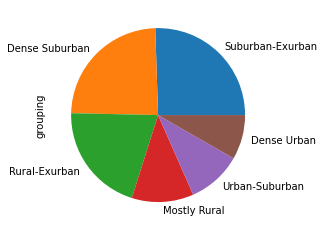

In [4]:
df_urban.grouping.value_counts(normalize = 'True').plot(kind = 'pie')

### Looks like about half of all congressional districts can be considered suburban, more than either urban or rural districts.

### fivethirtyeight has also included their partisan lean index as the pvi_22 column, weighted by past elections. Positive values indicate a Democratic lean, negative values indicate a Republican lean.

<AxesSubplot:xlabel='pvi_22', ylabel='Count'>

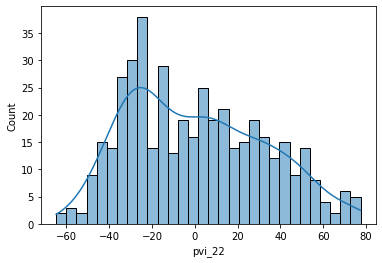

In [5]:
sns.histplot(data = df_urban, x = 'pvi_22', bins = 30, kde=True)

### There seem to be a wider range of Democratic-leaning districts, while the Republican-leaning districts are more concentrated in the +20-40 range.

In [6]:
#Average partisan lean and urbanization index by state
df_state_summary = df_urban[['state', 'pvi_22', 'urbanindex']].groupby('state').mean().sort_values(by=['pvi_22'], ascending = False)
df_state_summary

,pvi_22,urbanindex
state,,
MA,33.936409,11.857520
HI,31.812175,11.190180
VT,27.772880,9.053380
CA,26.202552,12.216909
MD,26.182079,11.746070
NY,24.177149,12.631584
RI,24.070475,11.761065
IL,14.940652,11.675868
DE,13.916320,11.047340


In [7]:
#Looks good, let's pretty it up for easier reading
df_state_summary.style.background_gradient(axis = 0, cmap = 'RdBu')

,pvi_22,urbanindex
state,,
MA,33.936409,11.857520
HI,31.812175,11.190180
VT,27.772880,9.053380
CA,26.202552,12.216909
MD,26.182079,11.746070
NY,24.177149,12.631584
RI,24.070475,11.761065
IL,14.940652,11.675868
DE,13.916320,11.047340


### No major surprises, with the large coastal states leaning Democratic and the central and southern states leaning Republican. It's a bit difficult to derive an urbanization index correlation at the macro state level though, with multiple outliers like Vermont, Maine, Texas and Florida defying the trend.

In [8]:
#quick tangent to look more closely at the previously-identified outlier states
outlier_filter = df_urban.state.isin(['VT', 'ME', 'TX', 'FL'])
df_urban[outlier_filter].sort_values(by = ['state', 'pvi_22']).style.background_gradient(axis = 0, cmap = 'RdBu', subset = 'pvi_22')

,stcd,state,cd,pvi_22,urbanindex,rural,exurban,suburban,urban,grouping
296,FL-01,FL,1,-38.020110,10.489310,25.034830,57.031540,17.933630,0.000000,Rural-Exurban
249,FL-12,FL,12,-34.038240,10.872480,22.049380,46.206890,31.743730,0.000000,Suburban-Exurban
309,FL-18,FL,18,-29.300310,10.275480,36.401560,50.579490,13.018940,0.000000,Rural-Exurban
304,FL-06,FL,6,-27.794080,10.348740,30.349910,58.377440,11.272650,0.000000,Rural-Exurban
192,FL-19,FL,19,-26.364570,11.429510,5.839410,42.619230,51.541360,0.000000,Suburban-Exurban
182,FL-05,FL,5,-23.283510,11.519800,5.529600,30.443040,64.027370,0.000000,Dense Suburban
227,FL-08,FL,8,-23.011110,11.054860,5.665940,73.222740,21.111320,0.000000,Suburban-Exurban
223,FL-17,FL,17,-22.372540,11.137130,5.271400,68.187770,26.540830,0.000000,Suburban-Exurban
233,FL-11,FL,11,-19.326710,10.997590,16.268630,55.605390,26.957360,1.168620,Suburban-Exurban
357,FL-03,FL,3,-18.156770,9.858960,50.540200,30.090940,19.368860,0.000000,Rural-Exurban


### But within each of these outlier states and relative to other districts in each state, there does seem to be a correlation. E.g. in Florida and Texas, most districts with urbanization index > 12 seem to lean Democratic. Maine and Vermont only have 1-2 districts for the entire state so their Democratic lean may be driven by other factors, e.g. being situated in the Northeast surrounded by very blue states.

### Let's now simply use the provided groupings based on urbanization index and analyze their partisan lean.

In [9]:
df_urban_summary = df_urban[['grouping', 'rural', 'exurban', 'suburban', 'urban', 'pvi_22']].groupby('grouping').mean().sort_values(by=['pvi_22'], ascending = False)
df_urban_summary.style.background_gradient(axis = None, cmap = 'RdBu', subset = 'pvi_22')

,rural,exurban,suburban,urban,pvi_22
grouping,,,,,
Dense Urban,0.012039,0.560487,2.884455,96.543021,48.509671
Urban-Suburban,0.565592,1.508111,19.148609,78.777690,33.917650
Dense Suburban,3.453449,16.066894,50.076438,30.403219,14.233489
Suburban-Exurban,21.588134,34.574491,37.484648,6.352726,-6.663297
Rural-Exurban,46.857669,35.329797,17.640693,0.171841,-24.761391
Mostly Rural,71.691897,24.922537,3.385566,0.000000,-29.881087


### This seems to confirm the original hypothesis, that cities lean Democratic and rural areas lean Republican. And it seems to be the case that Dense Suburban and Suburban-Exurban Congressional seats are the most competitive, with partisan leans within +/- 15. The average dense suburban seat is D+14 and the average suburban-exurban seat is R+7.

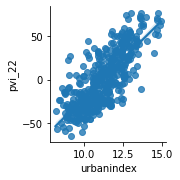

In [10]:
#visualize relationship between urbanization index and partisan lean
sns.pairplot(df_urban, x_vars = 'urbanindex', y_vars = 'pvi_22', kind = 'reg')

### Then is it as simple as saying the expected election outcome of a district is dependent entirely on the density of the population? Let's try something we did not do in class, which is a predictive model answering this question!

In [11]:
!pip install sklearn

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [13]:
#set independent variable to be the urbanization index, and the dependent variable (the one we want to predict) as the partisan lean
x = df_urban.urbanindex.values.reshape(435,1)
y = df_urban.pvi_22.values.reshape(435,1)

In [14]:
#set aside ~20% of the data as the test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [15]:
#fit model using training data
regr = LinearRegression()  
regr.fit(x_train, y_train)  

LinearRegression()

In [16]:
#print y-intercept and slope
print(regr.intercept_)
print(regr.coef_)

[-194.50396723]
[[17.43471642]]


In [17]:
y_pre = regr.predict(x_test)  

In [18]:
#RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pre)))

19.770632336572028


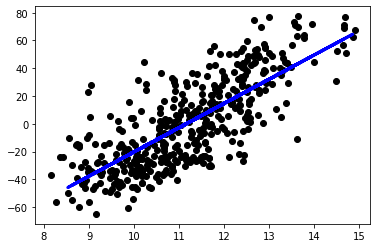

In [19]:
plt.scatter(x, y, color='black')
plt.plot(x_test, y_pre, color='blue', linewidth=3)
plt.show()

### The regression line seems to fit very well but that was a bit underwhelming. What if we factored in the state as a categorical variable, since we saw outliers like TX, FL and others earlier?

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [21]:
#In order to transform the strings in the state column into numerical features, we'll use one hot encoding
t = ColumnTransformer(transformers = [('onehot', OneHotEncoder(), ['state'])], remainder = 'passthrough')

In [22]:
feature_cols = ['urbanindex', 'state']
x = t.fit_transform(df_urban[feature_cols])
y = df_urban.pvi_22.values.reshape(435,1)

In [23]:
#435 records, and 51 features (1 x urbanization index, 50 x states with [0,1] values)
x.shape

(435, 51)

In [24]:
#set aside ~20% of the data as the test set
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)
regr2 = LinearRegression()  
regr2.fit(x_train, y_train)  

LinearRegression()

In [25]:
#print y-intercept and slope
print(regr2.intercept_)
print(regr2.coef_)

[-194.74741833]
[[ 24.9176307   -5.42942651  -3.27663224 -17.78085351   3.59814498
    0.10798753   3.70858457  12.35056715 -18.31186569 -10.25686358
   27.70811039  13.56919784 -28.66784117   4.84275894 -11.03159425
   -4.11072568 -11.66744599 -19.26812157  19.06046024  12.19976048
   33.68735587   0.27612278   9.12257016 -16.35139055  14.15134054
   25.68394323   3.33500614  -6.91855009 -15.02960846  15.30041479
   -7.45894189  30.27337972 -17.06561877  -7.786283    -8.84302642
  -20.36379829   9.00757503  -7.30942233   9.82168336  -4.33370396
    3.34242941 -14.44840281 -13.21021925 -25.7410518    1.49097796
    0.           5.73078479  16.9801644   -5.60556319   0.
   17.77017645]]


In [26]:
state_coef = dict(zip(df_urban['state'].unique(), regr2.coef_[0][1:]))
print(state_coef)

{'NY': -5.429426511439108, 'NJ': -3.2766322394443126, 'CA': -17.7808535067124, 'IL': 3.5981449834085537, 'PA': 0.10798752712160974, 'MA': 3.708584572791062, 'VA': 12.350567153413655, 'FL': -18.311865693250443, 'MD': -10.256863575827689, 'TX': 27.708110390348487, 'CO': 13.56919784051172, 'MN': -28.667841166883512, 'WA': 4.842758943992792, 'WI': -11.031594247895505, 'AZ': -4.110725684622404, 'MI': -11.667445986576764, 'NV': -19.268121569523256, 'OH': 19.06046023638577, 'GA': 12.199760475744158, 'MO': 33.68735587154381, 'HI': 0.2761227836933393, 'OR': 9.12257016222921, 'IN': -16.351390554803956, 'KY': 14.15134054084917, 'RI': 25.683943234744103, 'NE': 3.335006139593095, 'NC': -6.918550093333189, 'CT': -15.02960846030358, 'TN': 15.300414786693839, 'LA': -7.458941889669174, 'UT': 30.27337971718367, 'OK': -17.065618774157617, 'KS': -7.786282997085598, 'NM': -8.843026423990292, 'SC': -20.36379828783263, 'DE': 9.007575030760739, 'NH': -7.309422333093298, 'IA': 9.821683362158991, 'AL': -4.33370

### Interesting! At least with our limited sample size (435 records), we see that the states have an impact on the prediction of the partisan lean, with the exception of Alaska and North Dakota that have coefficients of 0. Also fascinating that California which is known to be a very blue state has a negative coefficient, which means it has to offset the impact of the urbanization index.

In [27]:
y_pre2 = regr2.predict(x_test)  
print(np.sqrt(metrics.mean_squared_error(y_test, y_pre2)))

19.631070226469177


### That's a slight improvement over the RMSE of our model with just urbanization index as the sole feature. We'll take it!

### As a fun exercise, let's run all 435 districts through our second model, and predict the elected House representative using just the state and the urbanization index, assuming the partisan lean decides the vote. Any positive prediction we'll count as a Democratic vote, and any negative prediction we'll count as a Republican vote. Then let's compare to the final distribution of House seats in the next Congress being seated in January 2023.

In [30]:
#x defined above and already onehotencoded
Dem = 0
Rep = 0
Tossup = 0
for district in x:
    vote = regr2.predict(district)
    if vote > 0:
        Dem += 1
    elif vote < 0:
        Rep += 1
    else:
        Tossup += 1
        
print ("Dem: " + str(Dem))
print ("Rep: " + str(Rep))
print ("Tossup: " + str(Tossup))

Dem: 219
Rep: 216
Tossup: 0


### We know that Republicans actually won 222 seats in the election, while Democrats won 213. This makes our model off by 6 seats (enough to decide the majority) but it only had 2 features to base a prediction off of! I can certainly see how political polling can get so complex!

## Recap and Learnings

### What originally started as a simple analysis of urbanization data pivoted into a few tangents and eventually into a simple predictive model using linear regression. While the original hypothesis that urban areas lean blue and rural areas lean red was confirmed, it was fascinating to see the subtle differences by state, where the outliers manifested, and how different density districts could sway in their partisan leaning. Even with limited data, we were able to create a prediction of partisan lean based on population density, and were even able to improve it slightly by folding in the state as an additional feature.

### Because Congressional districts are redrawn every 10 years, it's difficult to extend the data backwards by district but the relationship between population density and partisan lean over time would be interesting to explore given more time and resources.